In [1]:
import pandas as pd

crime_data = pd.read_csv("NIBRS.csv")

# Display the first few rows of the DataFrame to verify it was read correctly
crime_data.head()

,INCNUMBER,OFFENSECODE,Beat #,Service Area,MICRCODE,Offense Description,NIBRS Maping,NIBRS Category,NIBRS GRP,OFFENSETITLE,DATEOFOFFENSE,Day of week,Weapon Type,INCIDENT LOCATION BLOCK ADDRESS,Month
0,21-000001,9332.0,W4,West,Local,Local,Local,Local,Local,Sound of Gunshots,01/01/2021 12:03:15 AM,Friday,None,600 BLOCK 4TH ST NW,January
1,21-000002,5213.0,S3,South,52003,"Weapon Offense, Other",Weapon Law Violations,Crimes Against Society,Weapon Law Violations,"WEAPON FIRING (CARELESS, RECKLESS, HEEDLESS, ETC)",01/01/2021 12:06:02 AM,Friday,Firearm (type unknown),800 BLOCK CASS AV SE,January
2,21-000003,1396.0,S1,South,13002,Aggravated Assault,Aggravated Assault,Crimes Against Person,Assault Offenses,ASSAULT LESS THAN MURDER - GBH,01/01/2021 12:30:00 AM,Friday,Knife/Cutting Instrument,300 BLOCK ROBEY PL SE,January
3,21-000004,9330.0,W2,West,Local,Local,Local,Local,Local,Noise/Party/Disturbance,01/01/2021 12:14:31 AM,Friday,None,1500 BLOCK 4TH ST NW,January
4,21-000005,9141.0,W4,West,Local,Local,Local,Local,Local,Alarm - Burglary Commercial-False,01/01/2021 12:18:10 AM,Friday,None,1000 BLOCK FRONT AV NW,January


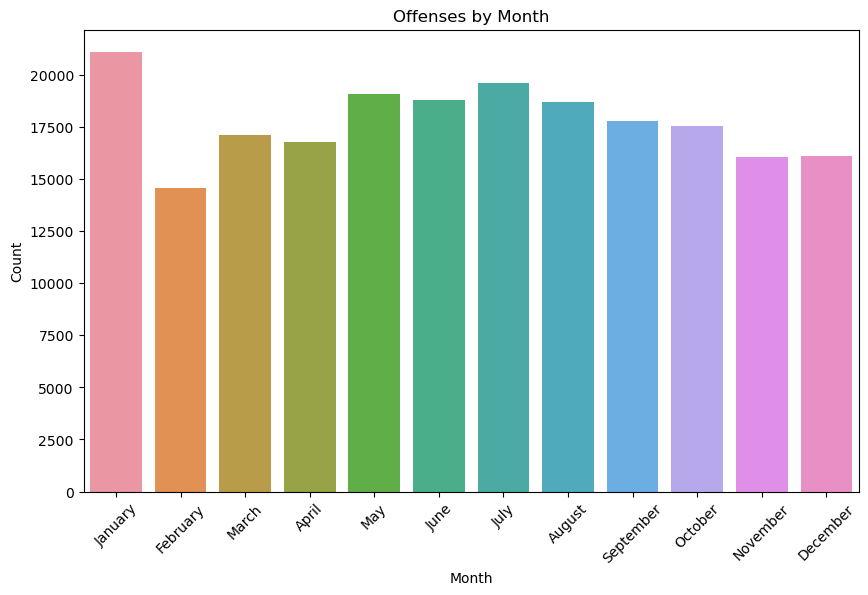

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Convert 'DATEOFOFFENSE' to datetime
crime_data['DATEOFOFFENSE'] = pd.to_datetime(crime_data['DATEOFOFFENSE'])

# Extract features like year, month, and hour
crime_data['Year'] = crime_data['DATEOFOFFENSE'].dt.year
crime_data['Month'] = crime_data['DATEOFOFFENSE'].dt.month
crime_data['Hour'] = crime_data['DATEOFOFFENSE'].dt.hour

month_names = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

crime_data['Month'] = crime_data['Month'].map(month_names)

# Exploratory Data Analysis (EDA)
# Distribution of offenses by month
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=crime_data, order=month_names.values())
plt.title('Offenses by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

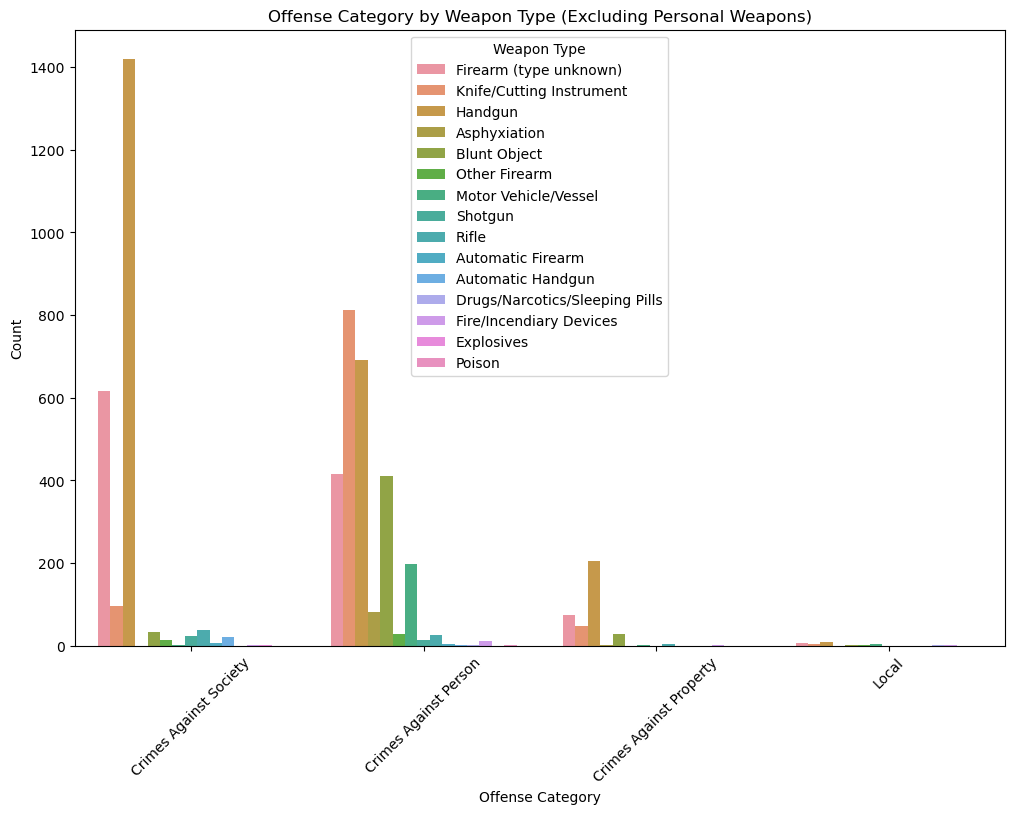

In [4]:
crime_data_cleaned = crime_data[(crime_data['NIBRS Category'] != '0') & 
                                (crime_data['Weapon Type'] != 'None') & 
                                (crime_data['Weapon Type'] != 'Personal Weapons') &
                                (crime_data['Weapon Type'] != 'Other') & 
                                (crime_data['Weapon Type'] != 'Unknown')]

# Remake the offense/weapon plot
plt.figure(figsize=(12, 8))
sns.countplot(x='NIBRS Category', hue='Weapon Type', data=crime_data_cleaned)
plt.title('Offense Category by Weapon Type (Excluding Personal Weapons)')
plt.xlabel('Offense Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Weapon Type')
plt.show()

Note that the majority of crimes fell under the "None" or "Personal Weapons" columns. It is unclear what "Personal Weapons" entails as opposed to the weapon types listed here, so that has been ommitted from this plot along with "None". (I also removed the ambiguous Unknown and Other categories). But it would appear the majority of crimes were commited with no weapon, as can be seen from the non-filtered breakdown:

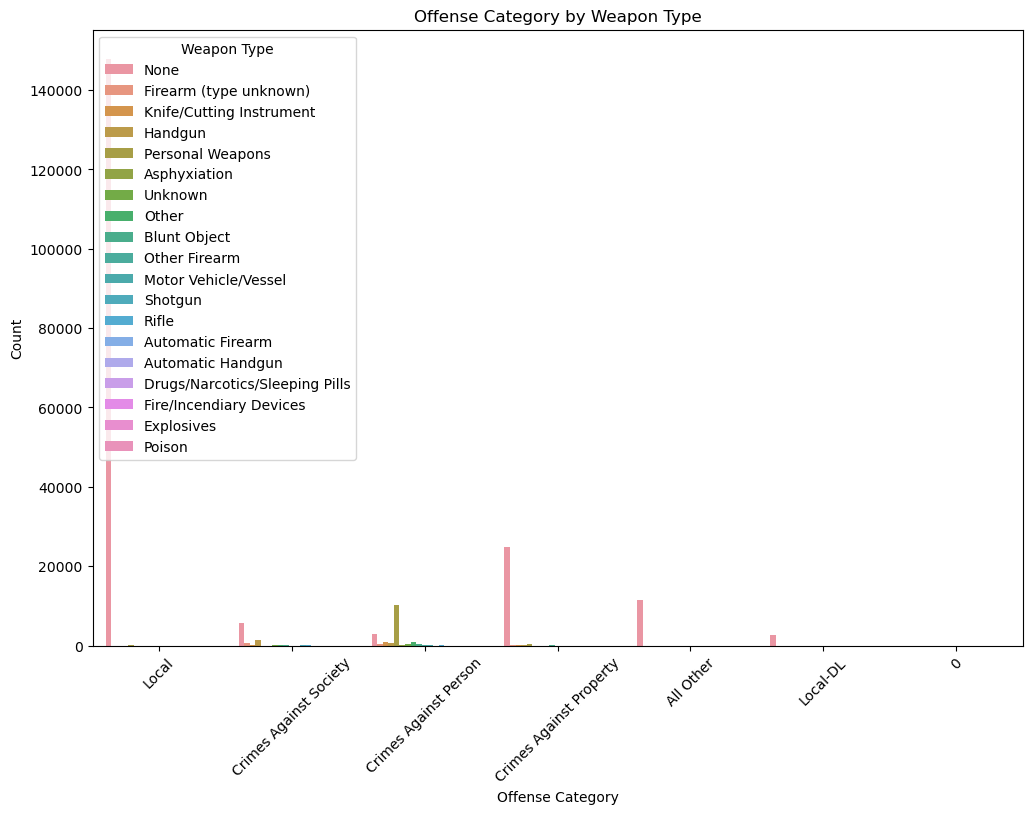

In [5]:
plt.figure(figsize=(12, 8))
sns.countplot(x='NIBRS Category', hue='Weapon Type', data=crime_data)
plt.title('Offense Category by Weapon Type')
plt.xlabel('Offense Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Weapon Type')
plt.show()

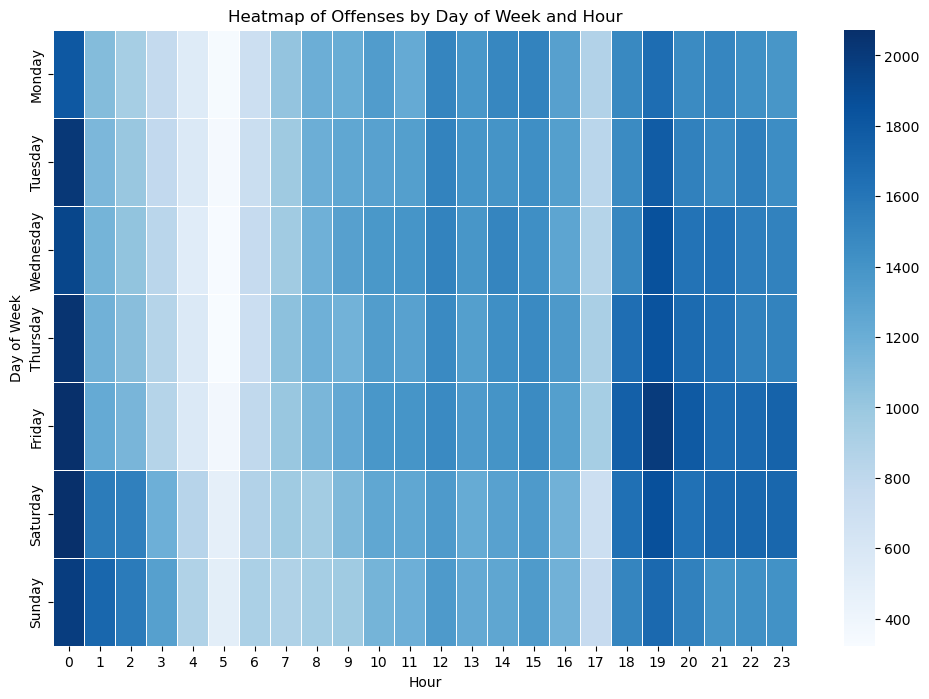

In [6]:
crime_data['Day of week'] = pd.Categorical(crime_data['Day of week'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
heatmap_data = crime_data.pivot_table(index='Day of week', columns='Hour', values='INCNUMBER', aggfunc='count')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Blues', linewidths=0.5)
plt.title('Heatmap of Offenses by Day of Week and Hour')
plt.xlabel('Hour')
plt.ylabel('Day of Week')
plt.show()

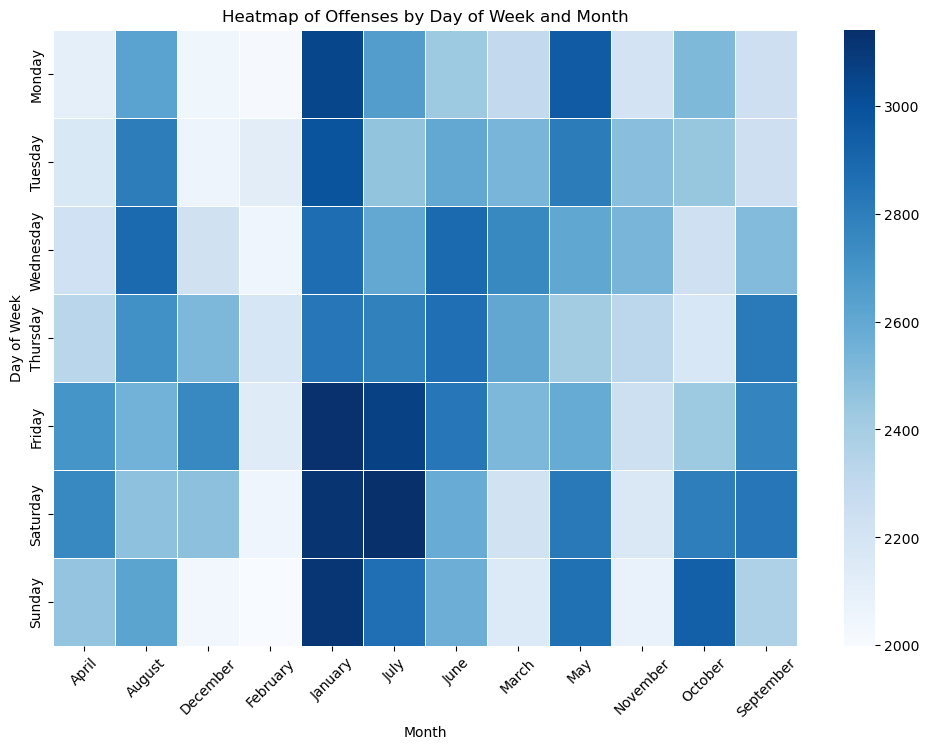

In [7]:
# Pivot table to get the count of offenses by day of week and month
heatmap_data = crime_data.pivot_table(index='Day of week', columns='Month', values='INCNUMBER', aggfunc='count')

# Reorder the index (day of week) to start from Monday
heatmap_data = heatmap_data.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Blues', linewidths=0.5)
plt.title('Heatmap of Offenses by Day of Week and Month')
plt.xlabel('Month')
plt.ylabel('Day of Week')
plt.xticks(rotation=45)
plt.show()


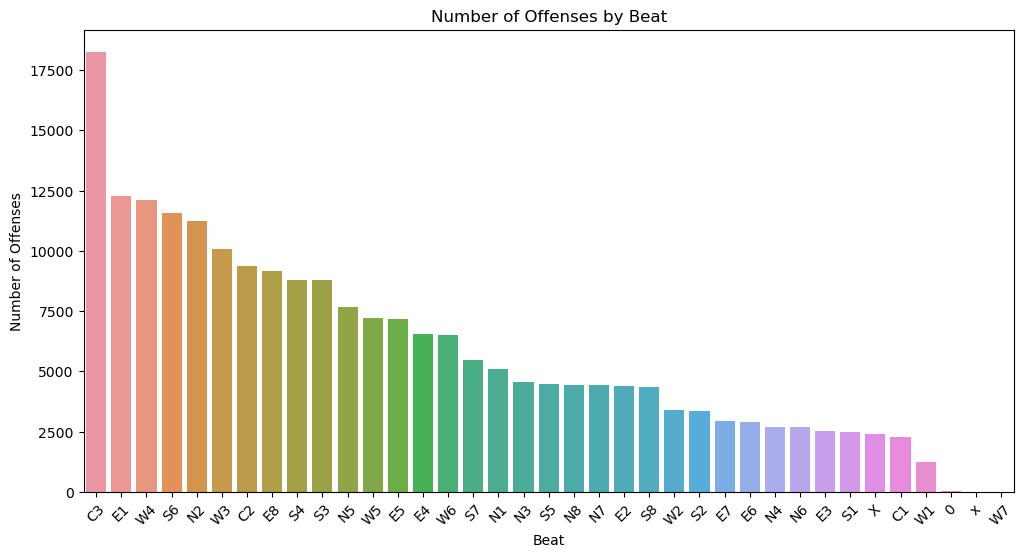

In [8]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Beat #', data=crime_data, order=crime_data['Beat #'].value_counts().index)
plt.title('Number of Offenses by Beat')
plt.xlabel('Beat')
plt.ylabel('Number of Offenses')
plt.xticks(rotation=45)
plt.show()